# Business Statistics of the Project: E-News Express
Tools Covered:
Hypothesis Testing
a/b Testing
Data Visualization
Statistical Inference

> On this occasion, the Sales Department has been asked to explore the data and a statistical analysis is carried out (at a level of significance of 5 %) to determine the effectiveness of the new destination page to gather new subscribers for the News portal. answering the following questions:
1. Do users spend more time on the new destination page than on the existing destination page?
2. Does the conversion rate (the proportion of users visiting the destination page and becomes) of the new page is greater than the conversion rate of the previous page?
3. Does the converted state depend on the preferred language? [Suggestion: Create a contingency table using the Pandas.crosstab () function] function
4. Is the time dedicated to the new page the same for different language users?
## Business context
The advent of electronic news portals has offered us a great opportunity to quickly obtain updates on the daily events that occur worldwide. The information in these portals is recovered electronically from online databases, is processed using a variety of software and then transmitted to users. There are multiple advantages of transmitting news electronically, such as faster access to content and the ability to use different technologies such as audio, graphics, video and other interactive elements that are not used or are not yet common in traditional newspapers.
E-News Express, an online news portal, aims to expand its business by acquiring new subscribers. Since each website visitor performs certain actions based on their interest, the company plans to analyze these actions to understand the interests of the users and determine how to promote a better commitment. E-New Express executives believe that there has been a decrease in the new monthly subscribers compared to last year because the current website is not well designed enough in terms of scheme and recommended content to keep customers committed enough to make the decision to subscribe.
[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B test, is used to determine if a new function attracts users based on a chosen metric.]

## Aim
The company's design team investigated and created a new destination page that has a new scheme and shows more relevant content compared to the previous page. To prove the effectiveness of the new destination page to gather new subscribers, the team conducted an experiment randomly selecting 100 users and dividing them into two groups equally. The existing destination page was shown to the first group (control group) and the new destination page to the second group (treatment group). Data were collected on the interaction of the users of both groups with the two versions of the destination page.

## Data dictionary
The data contains information on the interaction of the users of both groups with the two versions of the destination page.
1. User_id - Unique User ID of the person visiting the website
2. Group: if the user belongs to the first group (control) or the second group (treatment)
3. Landing_page: If the destination page is new or old
4. Time_pasado_en_la_página: Time (in minutes) passed by the user on the destination page
5. Converted: if the user becomes subscriber of the news portal or not
6. Language_Preferred: Language chosen by the user to see the destination page

### We import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats 

### loading the data set

In [2]:
# Complete The Code Below To Load The Datasetdf = pd.read_csv('abtest.csv')

## Explore the data set and remove information through exploratory data analysis

### Data Summary

The initial steps to obtain an overview of any data set are:- Observe the first rows of the data set, to verify whether the data set has been loaded correctly or not- Obtain information about the number of rows and columns in the data set- Find out the data types of the columns to ensure that the data is stored in the preferred format and that the value of each property is expected.- Verify the statistical summary of the data set to obtain a general description of the numerical columns of the data

#### Show the first rows of the data set

In [3]:
# Show the first 5 rows of the data setdf.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Show the latest rows of the data set

In [4]:
# Show the last 5 rows of the data setdf.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### checking the shape of the data set

In [5]:
# view the shape of the datasetdf.shape

(100, 6)

> There are 100 records and 6 columns in the proportionate file abtes.csv

#### Checking the data types of the columns for the data set

In [118]:
# Check The Data Types of the columns in the datasetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


> The User_id column is of whole data type.> The columns of Group, Landing_Page, Converted, Language_Preferred are of Object type (string).> The column Time_spent_on_the_page is float type.

#### Obtain the statistical summary of numerical variables

In [119]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


> Observations:> The minimum time that users pass on the page once they enter the page is 19 minutes.> The average time that users pass on the page is 53.7 minutes.> The maximum time that users pass on the page is 107.1 minutes.> The median that is in 54.15 minutes is very close to the average that users pass on the page once they enter.

#### Obtain the statistical summary of the categorical variablesRemember that these are variables that describe a 'characteristic' of a data unit and are selected from a small group of categories. Categorical variables can have the "object" or "int64" type. (It will also be seen in the univariate and multivariate analysis later)

In [120]:
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [121]:
df.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [122]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

([<matplotlib.patches.Wedge at 0x27905079eb0>,
 [Text(-0.13786663048841225, 1.0913261621521642, ''),
  Text(0.13786673266574093, -1.091326149244154, '')],
 [Text(-0.07519998026640666, 0.5952688157193622, '54.0 %'),
  Text(0.07520003599949504, -0.5952688086786293, '46.0 %')])

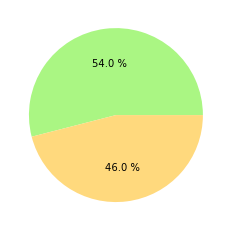

In [123]:
colores = ["#AAF683","#FFD97D"] # variables para el color de los valores de la grafica de pie
plt.pie(df.converted.value_counts(),explode=None,labels=None, colors=colores, autopct="%0.1f %%")

In [124]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

<AxesSubplot:xlabel='language_preferred', ylabel='count'>

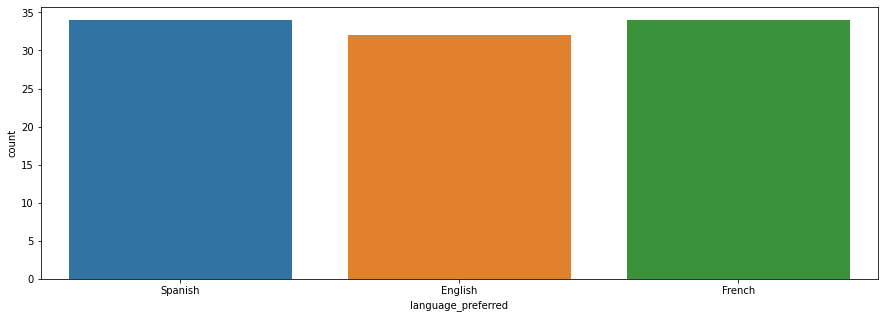

In [125]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'language_preferred') 

> As indicated by the group is divided into control and treatment with values ​​of 50 and 50. The same with Landing page its values ​​are 50 and 50 for Old and New. The convert field has the value of 54 for Yes and 46 for No. and in Language Preferred has three Spanish categories with 34, French 34 and English with 32.

### Check if values ​​are missing

In [126]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

<AxesSubplot:>

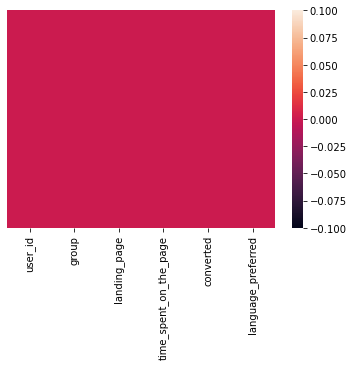

In [127]:
sns.heatmap(df.isnull(), yticklabels = False)  # verificamos en forma grafica mediante un mapa en todas las columnas 
# In case null values ​​or missing appear

In [128]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [129]:
df.isnull().any()   # ejecutamos esta instruccion para ver como responde en todas las columnas por si hay algun valor true

user_id                   False
group                     False
landing_page              False
time_spent_on_the_page    False
converted                 False
language_preferred        False
dtype: bool

> Given the above tests, it does not contain null values ​​or missing

### Search duplicates

In [130]:
df['user_id'].nunique()  # checamos los valores unicos con el comando nunique

100

In [131]:
df['user_id'].duplicated() # checamos si hay duplicados con el comando duplicated

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: user_id, Length: 100, dtype: bool

In [5]:
df['user_id'].duplicated().sum() # checamos si hay duplicados con el comando duplicated y con el comando sum para traer el
# Total duplicate elements (for the User_ID key field)

0

In [133]:
# I ask if the logity of the User_ID field (file key field), is equal to the key elements of the User_ID fieldif len(df['user_id']) == len(set(df['user_id'])):  # con el metodo set hace un barrido de los elementos unicos del campo
# print on the screen if there are no duplicates in the key    print('No hay valores duplicados en la llave User_id')
else:
# print on the screen if there are duplicates in the key    print('Si hay valores duplicados en la llave User_id')


No hay valores duplicados en la llave User_id


> Only the User_id key field is verified since the other fields are not key and can bring duplicates (without ISSUES or causing findings).

In [134]:
df.duplicated().sum() # checamos si hay duplicados con el comando duplicated y con el comando sum para traer el
# Total of duplicate elements (for all the dataframe or all the columns or file)

0

> There are no duplicate values ​​throughout the file therefore there are no duplicate values ​​in our Data Frame

### Univariate analysis

#### Permanence time on the page

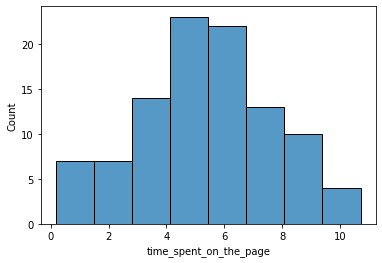

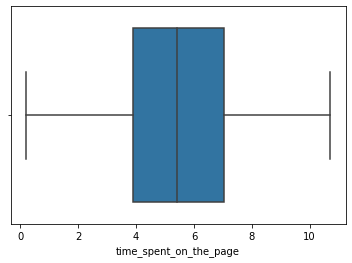

In [135]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

> It is observed that the last average time in minutes is 53 or 54 as it was observed in the previous statistical analysis and there is almost a symmetry.

#### Cluster

In [136]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

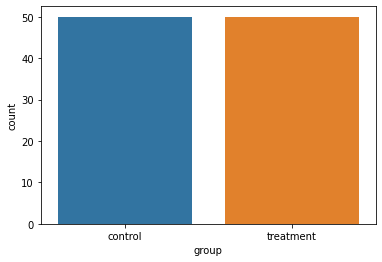

In [137]:
sns.countplot(data=df,x='group')
plt.show()

> 50 and 50 for the control and treatment group

#### Destination page

In [138]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

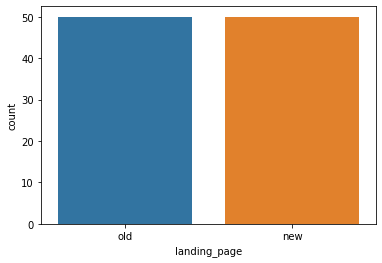

In [139]:
# Complete The Code To Plot The Countplootsns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [140]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

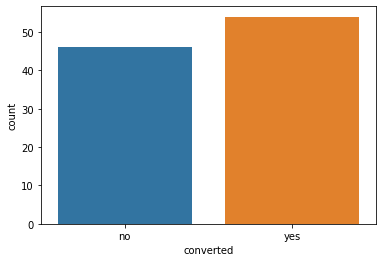

In [141]:
# Complete The Code To Plot The Countplootsns.countplot(data=df,x='converted')
plt.show()

> 50 and 50 for converted no and yes

#### Preferred language

In [142]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

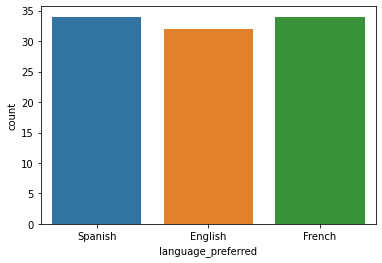

In [143]:
# Complete The Code To Plot The Countplootsns.countplot(data=df,x='language_preferred')
plt.show()

> Good apparently the less preferred language is English being this weird, since the universal or more common language throughout the world is English.

### Bivariate analysis

#### Destination page vs permanence time on the page

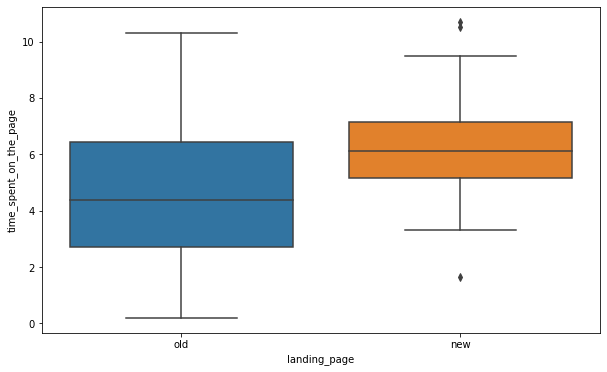

In [144]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()


> It is clearly observed that the average of the new page (New) in past time is greater than the old (Old) page.With the new page there are 7 minutes more than on the old page that a user spends time.

#### Status of conversion against the time of permanence on the page

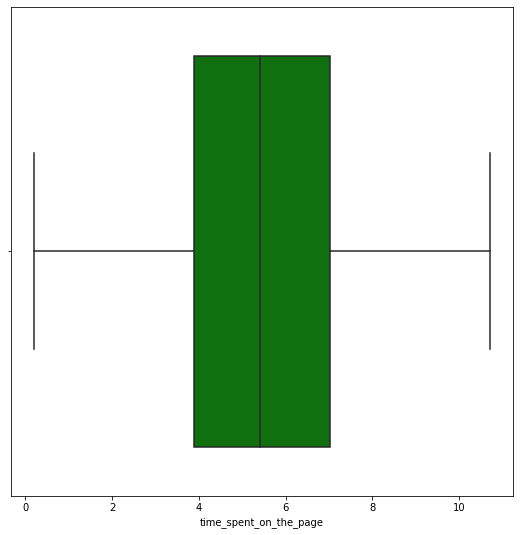

In [145]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', hue = 'converted', color = 'green')
plt.show()


> The average is almost 5.7 minutes a little more than 5.3 or 5.4 (which are the average and the median)

#### Preferred language against permanence time on the page

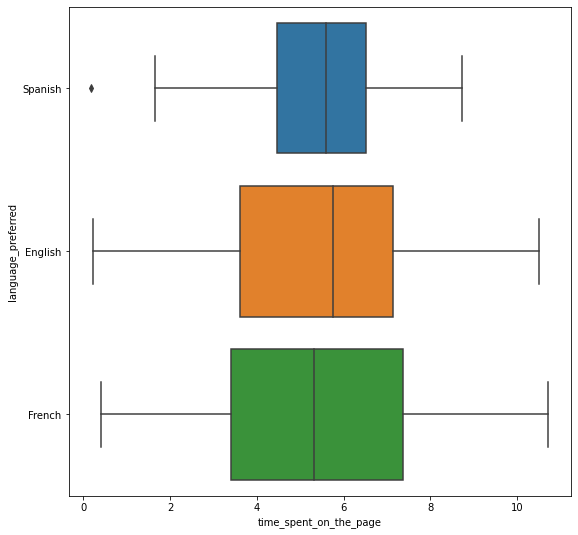

In [146]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

> The preferred language as to the time users spend on the page is English, followed by Spanish and finally is the French language.

## 1. Do the users spend more time on the new new destination page than on the existing destination page?

### Perform visual analysis

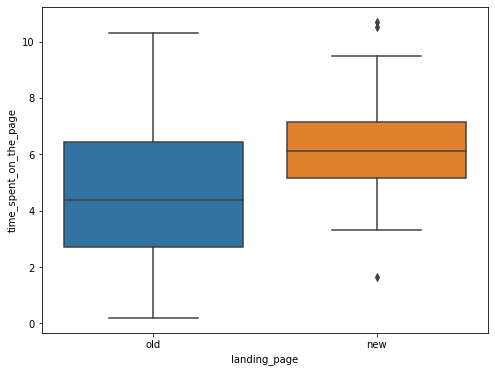

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

> It can be said that yes, that users spend most of the time on the new page (New) than in the old (Old)

### Step 1: Define the null and alternative hypothesis

$ H_0 $: 𝜇 1 = 𝜇 2 (the null hypothesis tells us that it is the same time, that users pass on the pages)

$ H_A $: 𝜇 1> 𝜇 2 (alternative hypothesis contradicts the null saying that users spend more time on the new page)


### Step 2: Select the right test

This is proof of a tail on two population averages of two independent populations. The standard population deviations are unknown. ** Based on this information, select the appropriate test **.

# <a name = 'link9'> ** The appropriate test is: Test T of two independent samples for the equality of means and unknown standard deviation ** </a>

### Step 3: Decide the level of significance

As indicated in the problem statement, we select $ \ Alpha = 0.05 $.

### Step 4: Collect and prepare data

In [148]:
# A data frame divided into subsets for new users of the destination page is createdtime_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page'] # new - para nueva pagina

# A data frame divided into subsets for users of the previous destination page is createdtime_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] # old - para vieja pagina

In [149]:
print('La desviación estándar muestral del tiempo empleado en la nueva página es:', round(time_spent_new.std(),2))
print('La desviación estándar muestral del tiempo empleado en la vieja página es:', round(time_spent_old.std(),2))

La desviación estándar muestral del tiempo empleado en la nueva página es: 1.82
La desviación estándar muestral del tiempo empleado en la vieja página es: 2.58


** Based on the standard deviations of the sample of the two groups, decide if it can be assumed that the standard population deviations are equal or unequal **.

> Obviously the standard population deviations are unequal.

### Step 5: Calculate the value P

In [150]:
# We import the required function (ttest_ind)from scipy.stats import ttest_ind

# Based on the Ttest_ind formuna we have:test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  
# Where our equal_var value is false and the alternative is greater
print('El p-value es', p_value)

El p-value es 0.0001392381225166549


### Step 6: Compare the P value with $ \ alpha $

In [151]:
# conclusion based on the value Pif p_value < 0.05:
    print(f'Como el valor p {p_value} es menor que el nivel de significación, rechazamos la hipótesis nula.')
else:
    print(f'Como el valor p {p_value} es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.')

Como el valor p 0.0001392381225166549 es menor que el nivel de significación, rechazamos la hipótesis nula.


### Step 7: Extract inference

> Since the P value is less than the level of significance (5%), we reject the null hypothesis.Therefore, we have enough statistical evidence to say that users spend more time on the new page.

## 2. The conversion rate (the proportion of users visiting the destination page and becomes) of the new page is greater than the conversion rate of the previous page?

### Perform visual analysis

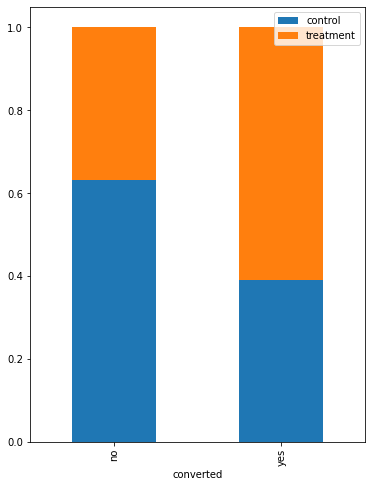

In [152]:
# Complete The Code To Visually Compare the Conversion Rate for the New Page and the Conversion Rate for The Old Pagepd.crosstab(df['converted'],df['group'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

> The graph shows that the conversion to the new page is greater, that is, the new page is greater than the conversion rate of the previous page

### Step 1: Define the null and alternative hypothesis

$ H_0 $: 𝜇 1 = 𝜇 2 (the null hypothesis tells us the conversion rate is the same between old and new pages (Old & New))

$ H_A $: 𝜇 1> 𝜇 2 (alternative hypothesis contradicts the null saying that the conversion for the new page is greater)

### Step 2: Select the right test

This is proof of a tail on two population proportions of two independent populations. ** Based on this information, select the appropriate test **.

# <a name = 'link9'> ** The appropriate test is: two proportions z ** </a>

### Step 3: Decide the level of significance

As indicated in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [153]:
# The number of users converted into the treatment group is calculated.new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# The number of users converted into the control group is calculatedold_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

# The N_Control variable for the total number of users in the control group is createdn_control = df.group.value_counts()['control'] 
# The N_Tratment variable for the total number of users in the treatment group is createdn_treatment = df.group.value_counts()['treatment'] 

print('El número de usuarios atendidos en las páginas nueva y antigua es {0} y {1} respectivamente'.format(n_control, n_treatment ))

El número de usuarios atendidos en las páginas nueva y antigua es 50 y 50 respectivamente


### Step 5: Calculate the value P

In [154]:
# We import the required functionfrom statsmodels.stats.proportion import proportions_ztest

# Based on the formuna of:test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger') 
# Where the alternative is greater
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the P value with $ \ alpha $

In [155]:
# print the conclusion based on P-Valueif p_value < 0.05:
    print(f'Como el valor p {p_value} es menor que el nivel de significación, rechazamos la hipótesis nula.')
else:
    print(f'Como el valor p {p_value} es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.')

Como el valor p 0.008026308204056278 es menor que el nivel de significación, rechazamos la hipótesis nula.


### Step 7: Extract inference

> Since the P value is less than the level of significance (5%), we reject the null hypothesis.Therefore, we have enough statistical evidence to say the new page is greater than the conversion rate of the previous page.

## 3. Does the converted state depend on the preferred language?

### Perform visual analysis

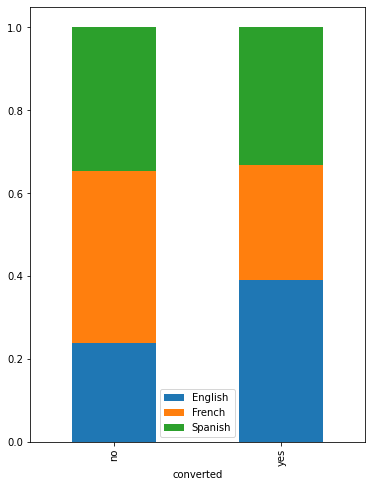

In [156]:
# Complete the code to visually draw the dependency between the conversion status and the preferred languagepd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


> Observing the graph carefully, it is not shown much or rather any evidence that can tell us that the converted state depends on the preferred language

### Step 1: Define the null and alternative hypothesis

$ H_0: $ The converted state and the preferred language are independent of each other
$ H_A: $ the converted state and the preferred language depend on each other

### Step 2: Select the right test

This is a problem of the independence test, which concerns two categorical variables: converted status and preferred language. ** Based on this information, select the right test. **

# <a name = 'link9'> ** The appropriate test is: Chi-square test for independence ** </a>

### Step 3: Decide the level of significance

As indicated in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [157]:
# A contingency table is created that shows the distribution of the two categorical variablescontingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the value P

In [158]:
# We import the Chi2_Contingency function to do the testfrom scipy.stats import chi2_contingency

# Based on the chi2_contingency formula we have:chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)  

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the P value with $ \ alpha $

In [159]:
# To be able to conclude we ask for the p_value valueif p_value < 0.05:
    print(f'Como el valor p {p_value} es menor que el nivel de significación, rechazamos la hipótesis nula.')
else:
    print(f'Como el valor p {p_value} es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.')

Como el valor p 0.21298887487543447 es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.


### Step 7: Extract inference

> Since the P value is greater than the level of significance of 5%, we do not reject the null hypothesis.Therefore, we do not have enough statistical evidence to say that the converted state depends on the preferred language

## 4. Is the time dedicated to the new page the same for users in different languages?

### Perform visual analysis

In [160]:
# Dataframe is created for users who liked the new pagedf_new = df[df['landing_page'] == 'new']

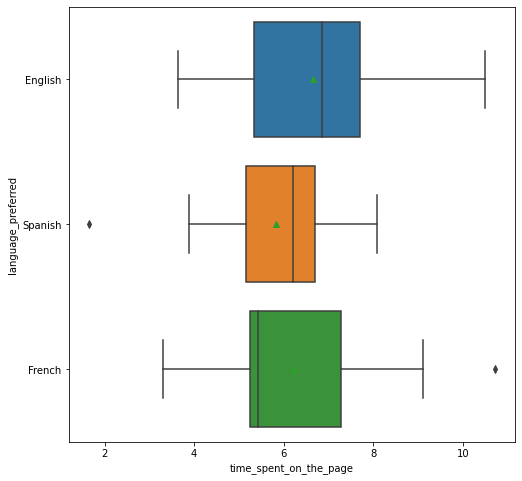

In [161]:
# Code to visually draw the time invested in the new page for users in different languagesplt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()


* The distribution of last time on the pages seems to differ between the three languages.* The English language seems to impact the new page.* The median of the past time on the pages seems to be closer to the languages ​​of English and Spanish, but the variation is lower for the French language.

In [162]:
# The past average time is calculated on the new page for users in different languagesdf_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternative hypothesis

$ H_0: $ The time dedicated to the new page is the same for users in different languages
$ H_A: $ at least one language is different in "time spent" to the new page for users

### Step 2: Select the right test

This is a problem related to three population averages. ** Based on this information, select the right test to compare the means of the three populations. **

# <a name = 'link9'> ** The appropriate test is: unidirectional anava taava ** </a>

### Step 3: Decide the level of significance

As indicated in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [163]:
# A sub -schedu# They pass on the new pagetime_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# A sub -scheduled frame is created of the time of permanence on the new page by users# of the French and Spanish language, respectively.time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the value P

In [164]:
# We import the f_oneway function to do the ANOVA testfrom scipy.stats import f_oneway

# We write the f_oneway function with the correct parameterstest_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the P value with $ \ alpha $

In [165]:
# We validate the value of P-Value to get to reject or not the hypothesisif p_value < 0.05:
    print(f'Como el valor p {p_value} es menor que el nivel de significación, rechazamos la hipótesis nula.')
else:
    print(f'Como el valor p {p_value} es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.')

Como el valor p 0.43204138694325955 es mayor que el nivel de significación, no podemos rechazar la hipótesis nula.


### Step 7: Extract inference

> Since the P value is greater than the level of significance (5%), we do not reject the null hypothesis.Therefore, we do not have enough statistical evidence to say that at least one language is different in "time spent" to the new page by users

## Conclusions

* Users spend most time on the new page (New) than in the old (Old).* The preferred language as the users spend on the page is English,followed by Spanish and finally is the French language.* The average of the new page (New) in past time in minutes is greater than the old (Old) page.* With the new page there are 7 minutes more than on the old page that a user spends time.* With the conversion, the average is 5.7 minutes a little more than 5.3 or 5.4 (which are the average and the median in thegiven statistic).* It is not much difference in the average on the new page and the old page. Only 3 minutes is not much.- From the sample data, we observe that- There is enough statistical evidence to say the new page is greater than the conversion rate of the previous page.- There is enough statistical evidence to say that users spend most of the time on the new page.- There is not enough statistical evidence to say that the converted state depends on the preferred language.- There is not enough statistical evidence to say that at least one language is different in "time spent" to the new page for users.

## Commercial recommendations

1. The column or the User_id field will not provide significant information, since it is a single identifier. (key)2. It would be good to have a small survey for subscribed users asking them that they like the old pageto incorporate or respected (if removed) to the new page in terms of content.3. Eliminate the old internet page once you have the certainty that it is no longer feasible to have it above, so thatUsers enter the new page and maintenance, lower costs.4. Do a survey to users signed for improvements in terms of content of the new page and evaluate the proposalsof the survey.5. Make an analysis and/or comparison with the news pages of the competition in terms of content and verify theContent of the new page and overcome the competition pages, given that it is a new page.6. Review the content of the entire page, in all its news categories, shows, sports, news, fashion, finance,Etcetera weather.7. Do an analysis by the page categories to know how many users are in each category, (news, shows,Sports, Etcetera), and to be able to take actions for each category to raise the quality of the new page more.

___